In [2]:
# 1번
# a
result <- table(mtcars$cyl)
# b
names(result) <- c("4기통", "6기통", "8기통")
# c
result_with_sum <- addmargins(result)
print(result_with_sum)


4기통 6기통 8기통   Sum 
   11     7    14    32 


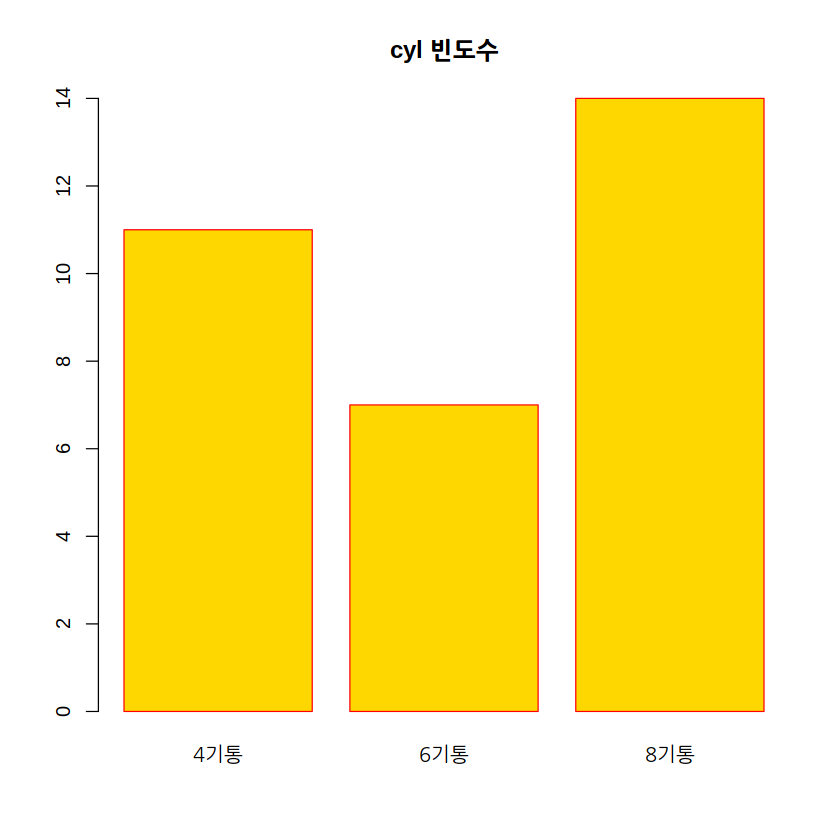

In [3]:
# 2번
barplot(result,
        col = "gold",      
        border = "red",     
        main = "cyl 빈도수",
        names.arg = names(result))

In [4]:
# 3번
# a
result <- tapply(mtcars$mpg, mtcars$cyl, mean)
# b
names(result) <- c("4기통", "6기통", "8기통")
# c
result <- round(result, 2)

print(result)

4기통 6기통 8기통 
26.66 19.74 15.10 


In [5]:
# 4번
result <- addmargins(table(mtcars$am, mtcars$cyl))
colnames(result) <- c("4기통", "6기통", "8기통", "전체")
rownames(result) <- c("auto", "manual", "전체")
result

,4기통,6기통,8기통,전체
auto,3,4,12,19
manual,8,3,2,13
전체,11,7,14,32


In [6]:
# 5번
result <- tapply(mtcars$mpg, list(mtcars$am, mtcars$cyl), mean)
colnames(result) <- c("4기통", "6기통", "8기통")
rownames(result) <- c("auto", "manual")
result

,4기통,6기통,8기통
auto,22.900,19.12500,15.05
manual,28.075,20.56667,15.40


In [7]:
# 6번
library(readxl)
sheet1 <- read_excel("../mydata/2015년 미세먼지.xlsx", sheet = 1)
sheet2 <- read_excel("../mydata/2015년 미세먼지.xlsx", sheet = 2)
sheet3 <- read_excel("../mydata/2015년 미세먼지.xlsx", sheet = 3)
mise <- rbind(sheet1, sheet2, sheet3)
head(mise)

AREA,Point,Date,Year,Month,Day,Time,PM10,PM25
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
서울,중구,2015010100,2015,1,1,0,44,7
서울,중구,2015010101,2015,1,1,1,57,10
서울,중구,2015010102,2015,1,1,2,76,10
서울,중구,2015010103,2015,1,1,3,86,11
서울,중구,2015010104,2015,1,1,4,106,12
서울,중구,2015010105,2015,1,1,5,128,18


In [8]:
# 7번
mise$prov <- sapply(strsplit(mise$AREA, " "), `[`, 1)
mise$city <- sapply(strsplit(mise$AREA, " "), `[`, 2)
tail(mise)

AREA,Point,Date,Year,Month,Day,Time,PM10,PM25,prov,city
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
경기 부천시,계남공원,2015073118,2015,7,31,18,NA,NA,경기,부천시
경기 부천시,계남공원,2015073119,2015,7,31,19,NA,NA,경기,부천시
경기 부천시,계남공원,2015073120,2015,7,31,20,NA,NA,경기,부천시
경기 부천시,계남공원,2015073121,2015,7,31,21,NA,NA,경기,부천시
경기 부천시,계남공원,2015073122,2015,7,31,22,NA,NA,경기,부천시
경기 부천시,계남공원,2015073123,2015,7,31,23,NA,NA,경기,부천시


In [9]:
# 8번
cb <- mise[mise$prov == "충북", ]
table(cb$Point)


        매포읍         문화동         복대동         사천동 송정동(봉명동) 
          5088           5080           5052           5088           5076 
        오창읍         용암동         장락동         청천면         칠금동 
          5088           5088           5059           4131           5087 
        호암동 
          5088 

In [10]:
# 9번
cb$Point2 <- paste(cb$city, cb$Point)
result <- cb[, c("AREA", "prov", "city", "Point", "Point2", "PM10")]
head(result)

AREA,prov,city,Point,Point2,PM10
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),36
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),47
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),35
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),60
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),81
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),94


In [11]:
# 10번
result <- tapply(cb$PM10, cb$Point2, mean, na.rm = TRUE)
result <- round(result, 2)
result <- as.matrix(result)
colnames(result) <- "PM10 평균"
print(result)

                      PM10 평균
괴산군 청천면             54.37
단양군 매포읍             46.41
제천시 장락동             52.06
청원군 오창읍             67.36
청주시 문화동             59.11
청주시 복대동             75.96
청주시 사천동             61.12
청주시 송정동(봉명동)     64.86
청주시 용암동             53.09
충주시 칠금동             58.53
충주시 호암동             43.14


In [12]:
# 11번
result <- tapply(mtcars$qsec, mtcars$gear, mean)
print(result)

     3      4      5 
17.692 18.965 15.640 


In [13]:
# 12번
library(doBy)
result <- summaryBy(qsec ~ gear, data = mtcars, FUN = c(length, mean))
result


Attaching package: ‘doBy’


The following object is masked from ‘package:dplyr’:

    order_by




,gear,qsec.length,qsec.mean
,<dbl>,<dbl>,<dbl>
1,3,15,17.692
2,4,12,18.965
3,5,5,15.640


In [14]:
# 13번
library(dplyr)

grp <- mtcars %>%
  group_by(gear) %>%
  summarise(freq = n(), mean = mean(qsec))

grp

gear,freq,mean
<dbl>,<int>,<dbl>
3,15,17.692
4,12,18.965
5,5,15.640


In [15]:
# 14번
result <- mtcars %>%
  group_by(gear) %>%
  summarise(freq = n(), mean = mean(qsec))

result


gear,freq,mean
<dbl>,<int>,<dbl>
3,15,17.692
4,12,18.965
5,5,15.640


In [16]:
# 15번
library(dplyr)

data <- read.csv("../mydata/2023년_도로교통공단_일자별 시군구별 교통사고 건수.csv", fileEncoding = "CP949")

data <- data %>%
  mutate(지역 = paste(시도, 시군구, sep = " ")) %>%
  select(지역, everything())  # 변수 순서를 지역 -> 나머지로 변경

head(data)


,지역,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울 용산구,1,1,서울,용산구,4,0,0,5,0
2,서울 성동구,1,1,서울,성동구,4,0,0,13,0
3,서울 동대문구,1,1,서울,동대문구,5,0,1,5,1
4,서울 성북구,1,1,서울,성북구,4,0,1,3,0
5,서울 은평구,1,1,서울,은평구,3,0,3,0,0
6,서울 서대문구,1,1,서울,서대문구,2,0,0,1,1


In [17]:
# 16번
library(doBy)

summary_result <- summaryBy(사고건수 ~ 발생월, 
                            data = data,
                            FUN = c(length, sum, mean, min, max, median))
summary_result

,발생월,사고건수.length,사고건수.sum,사고건수.mean,사고건수.min,사고건수.max,사고건수.median
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4497,14480,3.219924,1,23,2
2,2,4228,13284,3.141911,1,26,2
3,3,4813,16000,3.324330,1,26,2
4,4,4772,16336,3.423303,1,27,2
5,5,5021,17552,3.495718,1,24,3
6,6,4865,16716,3.435971,1,21,2
7,7,4878,16578,3.398524,1,21,2
8,8,4991,17212,3.448607,1,27,2
9,9,4939,17860,3.616117,1,26,3


In [18]:
# 17번
library(dplyr)

summary_result <- data %>%
  group_by(발생월) %>%
  summarise(
    사고건수합계 = sum(사고건수),
    사고건수평균 = mean(사고건수),
    사고건수최소값 = min(사고건수),
    사고건수최댓값 = max(사고건수),
    사고건수중앙값 = median(사고건수)
  )
summary_result

발생월,사고건수합계,사고건수평균,사고건수최소값,사고건수최댓값,사고건수중앙값
<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,14480,3.219924,1,23,2
2,13284,3.141911,1,26,2
3,16000,3.324330,1,26,2
4,16336,3.423303,1,27,2
5,17552,3.495718,1,24,3
6,16716,3.435971,1,21,2
7,16578,3.398524,1,21,2
8,17212,3.448607,1,27,2
9,17860,3.616117,1,26,3


In [19]:
# 18번
library(doBy)

summary_result <- summaryBy(경상자수 ~ 시도, 
                            data = data,
                            FUN = c(length, sum, mean, min, max, median))
summary_result

,시도,경상자수.length,경상자수.sum,경상자수.mean,경상자수.min,경상자수.max,경상자수.median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,강원,3005,6589,2.192679,0,23,1
2,경기,9830,59220,6.024415,0,77,4
3,경남,3915,9982,2.549681,0,26,2
4,경북,4439,10854,2.445145,0,25,2
5,광주,1672,8906,5.326555,0,32,5
6,대구,2756,11568,4.197388,0,23,3
7,대전,1736,8703,5.013249,0,26,4
8,부산,4703,10729,2.281310,0,26,2
9,서울,8544,34065,3.987008,0,57,3


In [20]:
# 19번
library(dplyr)

summary_result <- data %>%
  group_by(시도) %>%
  summarise(
    사고건수합계 = sum(사고건수),
    사망자수합계 = sum(사망자수),
    경상자수합계 = sum(경상자수),
    중상자수합계 = sum(중상자수),
    사고건수건수 = n()
  )
summary_result

시도,사고건수합계,사망자수합계,경상자수합계,중상자수합계,사고건수건수
<chr>,<int>,<int>,<int>,<int>,<int>
강원,6079,140,6589,1904,3005
경기,53164,502,59220,12724,9830
경남,11122,237,9982,4412,3915
경북,10777,263,10854,3748,4439
광주,6972,48,8906,1094,1672
대구,10880,86,11568,2685,2756
대전,7398,61,8703,1559,1736
부산,11003,103,10729,3319,4703
서울,33811,180,34065,7809,8544


In [21]:
# 20번
pivot_table <- tapply(data$사고건수, list(data$시도, data$발생월), mean, na.rm = TRUE)
pivot_table

,1,2,3,4,5,6,7,8,9,10,11,12
강원,2.023923,1.945813,1.972477,1.952586,2.166038,1.996324,1.897810,2.107639,2.086643,2.003584,2.098712,1.992157
경기,5.066998,4.835358,5.152174,5.309963,5.559905,5.350856,5.186747,5.494700,5.896933,5.405244,5.885366,5.692029
경남,2.546713,2.695205,2.903537,3.003155,2.815249,2.753709,2.856716,2.767442,2.982558,2.701117,2.935385,3.105590
경북,2.432099,2.169872,2.374677,2.471545,2.450980,2.360202,2.535912,2.563187,2.482323,2.398458,2.456464,2.403409
광주,3.500000,3.801653,4.159722,4.366906,4.482014,4.014388,4.219858,3.979452,4.661871,4.125000,4.425532,4.244755
대구,3.616740,3.829268,3.895652,4.096916,4.142241,4.295964,4.046414,3.846809,3.938596,3.942387,3.974026,3.747899
대전,3.758621,3.846154,4.047297,4.111888,4.645833,4.358621,4.226027,4.184932,4.708333,4.108108,4.986577,4.108108
부산,2.125326,2.241573,2.307305,2.347500,2.354217,2.377892,2.330049,2.324675,2.421053,2.340796,2.408521,2.483376
서울,3.567797,3.544323,3.655556,3.860955,3.967213,4.005682,3.864828,4.090153,4.284703,4.191989,4.246499,4.160544
세종,3.038462,3.120000,3.366667,3.464286,3.566667,4.103448,3.068966,3.500000,4.000000,3.400000,3.384615,2.967742


In [22]:
# 21번
library(dplyr)

news <- data %>%
  filter(grepl("동|서|남|북", 시군구) & grepl("시$", 시군구))

table(news$지역)


  강원 동해시 경기 남양주시 경기 동두천시   경기 성남시   경기 하남시 
          213           359           204           365           351 
  경북 안동시   전북 남원시 제주 서귀포시   충남 서산시 
          316           194           354           300 

In [23]:
# 22번
library(doBy)

summary_result <- summaryBy(경상자수 ~ 지역, 
                            data = data,
                            FUN = c(sum, mean, max, min, median))
summary_result

,지역,경상자수.sum,경상자수.mean,경상자수.max,경상자수.min,경상자수.median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,강원 강릉시,834,2.673077,17,0,2
2,강원 고성군,95,1.010638,5,0,1
3,강원 동해시,336,1.577465,7,0,1
4,강원 삼척시,214,1.407895,7,0,1
5,강원 속초시,378,1.680000,10,0,1
6,강원 양구군,91,1.109756,7,0,0
7,강원 양양군,199,1.592000,6,0,1
8,강원 영월군,141,1.226087,6,0,1
9,강원 원주시,1615,4.562147,14,0,4


In [24]:
# 23번
pivot_table <- tapply(data$사고건수, list(data$지역, data$발생월), sum, na.rm = TRUE)
pivot_table

,1,2,3,4,5,6,7,8,9,10,11,12
강원 강릉시,52,45,55,47,92,79,50,85,67,72,65,49
강원 고성군,7,8,12,9,8,12,10,7,14,7,5,12
강원 동해시,20,27,25,19,25,32,31,29,28,27,26,26
강원 삼척시,10,6,15,22,24,21,12,21,20,13,14,22
강원 속초시,23,28,20,26,36,22,36,44,19,43,28,37
강원 양구군,3,3,5,5,11,9,10,8,10,10,9,10
강원 양양군,6,10,4,19,9,19,12,27,16,22,5,13
강원 영월군,11,10,18,11,18,14,12,10,14,11,9,13
강원 원주시,134,101,103,105,136,127,113,135,129,121,117,102
강원 인제군,6,4,5,7,9,10,11,10,17,10,8,10



# 24번  

'''   
library(readxl)  
  
sheet1 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 1)  
sheet2 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 2)  
sheet3 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 3)  
sheet4 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 4)  
sheet5 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 5)  
sheet6 <- read_xlsx("../mydata/air_2021.xlsx", sheet = 6)  

air <- rbind(sheet1, sheet2, sheet3, sheet4, sheet5, sheet6)  
head(air)  
'''  

In [25]:
air <- read.csv("../mydata/air_2021.csv")
head(air)

,prov,city,point,code,datatime,SC2,PM10,O3,NO2,CO,PM25
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,강원,강릉시,옥천동,632132,2021-01-01 01:00:00,0.003,21,0.031,0.011,0.3,-999
2,강원,강릉시,옥천동,632132,2021-01-01 02:00:00,0.003,16,0.028,0.014,0.4,-999
3,강원,강릉시,옥천동,632132,2021-01-01 03:00:00,0.003,19,0.029,0.012,0.3,-999
4,강원,강릉시,옥천동,632132,2021-01-01 04:00:00,0.003,19,0.031,0.011,0.3,-999
5,강원,강릉시,옥천동,632132,2021-01-01 05:00:00,0.003,18,0.028,0.015,0.3,-999
6,강원,강릉시,옥천동,632132,2021-01-01 06:00:00,0.003,16,0.027,0.018,0.3,-999


In [26]:
# 25번
jj <- subset(air, prov %in% c("전남", "전북"))
table(jj$prov)


  전남   전북 
375240 332904 

In [ ]:
# 26번
library(dplyr)
newjj <- jj %>%
  filter(grepl("시$", city)) %>%
  mutate(
    year = as.integer(format(as.POSIXct(datatime, format = "%Y-%m-%d %H:%M:%S"), "%Y")),
    month = as.integer(format(as.POSIXct(datatime, format = "%Y-%m-%d %H:%M:%S"), "%m")),
    day = as.integer(format(as.POSIXct(datatime, format = "%Y-%m-%d %H:%M:%S"), "%d")),
    city2 = paste(prov, city, sep = " ")
  ) %>%
  select(city2, point, year, month, day, PM10, PM25)

head(newjj)


,city2,point,year,month,day,PM10,PM25
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,전남 광양시,중동,2021,1,1,17,9
2,전남 광양시,중동,2021,1,1,17,8
3,전남 광양시,중동,2021,1,1,16,9
4,전남 광양시,중동,2021,1,1,14,9
5,전남 광양시,중동,2021,1,1,16,7
6,전남 광양시,중동,2021,1,1,13,7


In [32]:
# 27번
table(newjj$city2)


전남 광양시 전남 나주시 전남 목포시 전남 순천시 전남 여수시 전북 군산시 
      35016        8760       17520       43800       70080       57696 
전북 김제시 전북 남원시 전북 익산시 전북 전주시 전북 정읍시 
       8760        9864       48072       52560       24960 

In [33]:
# 28번
summary(newjj)

    city2              point                year           month       
 Length:377088      Length:377088      Min.   :2021    Min.   : 1.000  
 Class :character   Class :character   1st Qu.:2021    1st Qu.: 4.000  
 Mode  :character   Mode  :character   Median :2021    Median : 7.000  
                                       Mean   :2021    Mean   : 6.646  
                                       3rd Qu.:2021    3rd Qu.:10.000  
                                       Max.   :2021    Max.   :12.000  
                                       NA's   :15712   NA's   :15712   
      day             PM10             PM25        
 Min.   : 1.00   Min.   :-999.0   Min.   :-999.00  
 1st Qu.: 8.00   1st Qu.:  14.0   1st Qu.:   6.00  
 Median :16.00   Median :  24.0   Median :  12.00  
 Mean   :15.76   Mean   : -45.8   Mean   : -74.93  
 3rd Qu.:23.00   3rd Qu.:  39.0   3rd Qu.:  21.00  
 Max.   :31.00   Max.   :1569.0   Max.   : 235.00  
 NA's   :15712                                     

In [36]:
# 29번
newjj[newjj == -999] <- NA
summary(newjj)

    city2              point                year           month       
 Length:377088      Length:377088      Min.   :2021    Min.   : 1.000  
 Class :character   Class :character   1st Qu.:2021    1st Qu.: 4.000  
 Mode  :character   Mode  :character   Median :2021    Median : 7.000  
                                       Mean   :2021    Mean   : 6.646  
                                       3rd Qu.:2021    3rd Qu.:10.000  
                                       Max.   :2021    Max.   :12.000  
                                       NA's   :15712   NA's   :15712   
      day             PM10             PM25       
 Min.   : 1.00   Min.   :   1.0   Min.   :  0.00  
 1st Qu.: 8.00   1st Qu.:  17.0   1st Qu.:  8.00  
 Median :16.00   Median :  26.0   Median : 13.00  
 Mean   :15.76   Mean   :  35.3   Mean   : 17.34  
 3rd Qu.:23.00   3rd Qu.:  41.0   3rd Qu.: 22.00  
 Max.   :31.00   Max.   :1569.0   Max.   :235.00  
 NA's   :15712   NA's   :29567    NA's   :34234   

In [37]:
# 30번
library(dplyr)

grp <- newjj %>%
  group_by(city2) %>%
  summarise(
    n = sum(!is.na(PM10)),
    평균 = mean(PM10, na.rm = TRUE),
    최소값 = min(PM10, na.rm = TRUE),
    최대값 = max(PM10, na.rm = TRUE),
    중앙값 = median(PM10, na.rm = TRUE)
  )

grp

city2,n,평균,최소값,최대값,중앙값
<chr>,<int>,<dbl>,<int>,<int>,<dbl>
전남 광양시,29008,32.67643,1,1175,24
전남 나주시,8379,28.24728,1,861,20
전남 목포시,16738,37.21394,2,1569,26
전남 순천시,41875,28.88898,1,1305,22
전남 여수시,67525,28.64221,1,1182,21
전북 군산시,55251,42.16754,1,1194,31
전북 김제시,8533,43.19559,1,985,32
전북 남원시,8785,31.26227,1,985,24
전북 익산시,39098,39.97371,1,935,30


In [38]:
# 31번
yeosu <- newjj %>%
  filter(grepl("여수시", city2))

head(yeosu)

,city2,point,year,month,day,PM10,PM25
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,전남 여수시,서강동,2021,1,1,16,2
2,전남 여수시,서강동,2021,1,1,14,1
3,전남 여수시,서강동,2021,1,1,15,7
4,전남 여수시,서강동,2021,1,1,15,9
5,전남 여수시,서강동,2021,1,1,14,9
6,전남 여수시,서강동,2021,1,1,15,8


In [ ]:
# 32번
library(dplyr)
library(tidyr)

pivot_table <- yeosu %>%
  group_by(point, month) %>%
  summarise(PM10_avg = mean(PM10, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(names_from = month, values_from = PM10_avg)

pivot_table <- pivot_table %>%
  mutate(all = rowMeans(select(., -point), na.rm = TRUE))
col_names <- names(pivot_table)

all_row <- as.list(colMeans(select(pivot_table, -point), na.rm = TRUE))
all_row <- c(point = "all", all_row)

pivot_table <- bind_rows(
  pivot_table,
  as_tibble(all_row)
)

pivot_table

point,1,2,3,4,5,6,7,8,9,10,11,12,NA,all
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
덕충동,31.40116,29.25000,51.63374,27.26492,40.19714,20.44428,17.44265,16.83915,15.50823,19.91311,27.05207,23.45781,23.39542,26.44613
문수동,28.21358,25.74411,48.41044,27.24673,37.86017,19.97518,15.45726,15.63897,15.05631,21.18260,28.46034,26.21176,23.67877,25.62586
삼일동,30.30868,28.53894,51.54610,27.94760,38.54054,21.14116,15.23338,17.72230,14.74913,22.04441,30.88306,29.81606,24.75706,27.17142
서강동,30.52180,27.87695,59.28481,30.03188,42.95339,21.56788,16.21135,16.61429,15.12738,23.10578,32.53363,28.83708,25.85794,28.50186
여천동,32.84225,30.33333,53.67770,29.45560,39.69972,21.99854,17.50593,18.12077,14.88428,22.31429,27.81065,24.82514,25.38310,27.60395
월내동,32.34638,34.05806,58.87139,37.24229,50.41755,29.06298,23.84311,23.68144,20.29038,25.86277,30.07761,27.46212,29.45858,32.51344
율촌면,33.81575,32.30469,55.83871,32.57872,43.81716,27.23504,20.11299,21.29901,16.64824,25.54597,34.57526,31.22779,28.93075,31.07154
화양면,31.14710,28.59502,61.00000,29.02035,41.83097,22.12760,16.14245,17.62680,15.12078,24.26383,30.35355,27.30057,26.67045,28.55380
all,31.32459,29.58764,55.03286,30.09851,41.91458,22.94408,17.74364,18.44284,15.92309,23.02909,30.21827,27.39229,26.01651,28.43600
